In [1]:
import pandas as pd

### Clean Data ke Corpus

In [2]:
df = pd.read_csv('D:\Dafa\Jupyter\gemasyik\src\cleaned_mb.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\user\AppData\Local\Temp\ipykernel_19836\825133297.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\Dafa\Jupyter\gemasyik\src\cleaned_mb.csv')


In [3]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
# from gensim.model import CoherenceModel

In [4]:
def gen_words(texts):
  final = []
  for text in texts:
    new = gensim.utils.simple_preprocess(text, deacc=True)
    final.append(new)
  return final

In [5]:
# df['full_text'] = df['full_text'].astype(str)

In [6]:
# search df['full_text'] with float
df.dropna(subset=['full_text'], inplace=True)


In [7]:
texts = gen_words(df['full_text'])

In [8]:
texts

[['kerja', 'ajar', 'senang', 'senang', 'penuh', 'semangat', 'merdeka'],
 ['tpn',
  'guruguru',
  'merdeka',
  'ajar',
  'moga',
  'tahun',
  'depan',
  'gabung',
  'tpn'],
 ['kbm',
  'ambengan',
  'batu',
  'admin',
  'mau',
  'share',
  'beberapa',
  'dokumentasi',
  'giat',
  'ajar',
  'ajar',
  'ambengan',
  'batu',
  'siang',
  'tadi',
  'anak',
  'merdeka',
  'ambengan',
  'batu',
  'gambar',
  'warna',
  'bareng',
  'kakakkakak',
  'pens'],
 ['kbm',
  'tl',
  'ambengan',
  'admin',
  'mau',
  'share',
  'beberapa',
  'dokumentasi',
  'giat',
  'ajar',
  'ajar',
  'tl',
  'ambengan',
  'sore',
  'tadi',
  'anak',
  'merdeka',
  'tl',
  'ambengan',
  'ajar',
  'seni',
  'warna',
  'cerita'],
 ['harus',
  'ajar',
  'loyal',
  'nurani',
  'pikir',
  'sendiri',
  'my',
  'heart',
  'is',
  'my',
  'king',
  'jangan',
  'loyal',
  'tokoh',
  'loyal',
  'niat',
  'baik',
  'puji',
  'puji',
  'kalau',
  'salah',
  'tutup',
  'kasihan',
  'sekian',
  'lama',
  'merdeka',
  'mental',
  'i

In [9]:
id2word = corpora.Dictionary(texts)

corpus = []
for text in texts:
  new = id2word.doc2bow(text)
  corpus.append(new)

In [10]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2)],
 [(0, 1), (2, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2)],
 [(0, 2),
  (2, 1),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 1),
  (16, 3),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(0, 3),
  (2, 1),
  (12, 1),
  (13, 3),
  (14, 1),
  (17, 1),
  (18, 1),
  (20, 1),
  (22, 1),
  (23, 1),
  (25, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 3)],
 [(0, 1),
  (2, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 3),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1)],
 [(0, 1), (2, 1), (57, 5), (58, 1), (59, 1), (60, 1), (61, 1)],
 [(0, 1),
  (2, 1),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1)],
 [(0, 1),
  (2, 1

### LDA Visualization

In [11]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=15,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100,
                                            alpha='auto'
                                            )

In [15]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds', n_jobs=2)
vis

c:\Users\user\anaconda3\envs\LDA\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\user\anaconda3\envs\LDA\Lib\site-packages\pandas\core\computation\expr.py:558: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return self.const_type(node.n, self.env)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.432393 -0.299680       1        1  28.791246
1      0.368306 -0.214657       2        1  10.938688
2     -0.471449  0.187890       3        1  10.862337
0      0.260679 -0.409365       4        1  10.056592
9      0.470761 -0.003421       5        1   9.000022
13     0.380431  0.253430       6        1   5.420441
14     0.164982  0.435864       7        1   5.156801
12     0.023015 -0.395031       8        1   4.511971
11    -0.354171 -0.038002       9        1   3.859514
10    -0.175071 -0.360649      10        1   3.570444
5     -0.080905  0.425646      11        1   3.316398
7     -0.220955  0.276080      12        1   1.890463
8      0.149708  0.126796      13        1   1.658117
6     -0.041178 -0.072020      14        1   0.898340
4     -0.041761  0.087119      15        1   0.068629, topic_info=        Term          Freq         Total Category  logprob  loglift
0       ajar  41364.000000  41364.000000  Default  30.0000  30.0000
2    merdeka  40373.000000  40373.000000  Default  29.0000  29.0000
140     sama  10279.000000  10279.000000  Default  28.0000  28.0000
252     guru  10147.000000  10147.000000  Default  27.0000  27.0000
524  program   6363.000000   6363.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
25     share      0.013928     13.070381  Topic15 -10.1313   0.4400
26     siang      0.013928     92.734595  Topic15 -10.1313  -1.5194
27      tadi      0.013928     63.033697  Topic15 -10.1313  -1.1333
28     warna      0.013928     23.652670  Topic15 -10.1313  -0.1531
29    cerita      0.013928    351.619603  Topic15 -10.1313  -2.8522

[538 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
322      11  0.998748     ada
12        2  0.993775   admin
201      14  0.995161   agama
71       13  0.924532      ah
177       6  0.996532     air
...     ...       ...     ...
501       5  0.999697   wujud
90       13  0.906755     yes
219       2  0.982029     yuk
219       5  0.017562     yuk
1684      9  0.988707  zonasi

[405 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1, 10, 14, 15, 13, 12, 11, 6, 8, 9, 7, 5])

### Dynamic LDA Modelling

In [13]:
import matplotlib.pyplot as plt

In [11]:
df['created_at'] = pd.to_datetime(df['created_at'])

<Axes: >

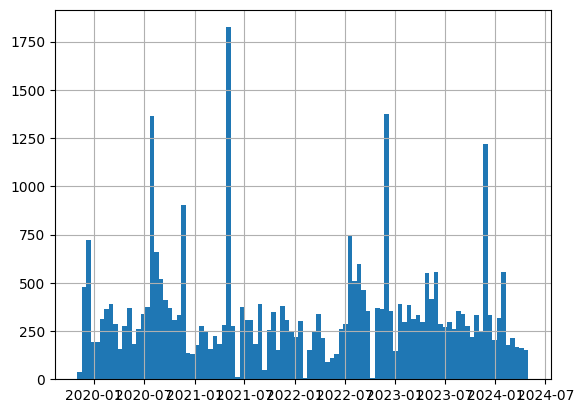

In [12]:
# visualize how much data with created_at as timestamps
df['created_at'].hist(bins=100)

In [13]:
# pick the data with year 2019
num_19 = len(df[df['created_at'].dt.year == 2019])

def slice_num_data(year):
    num = []
    num.append(len(df.loc[(df['created_at'].dt.year == year) & (df['created_at'].dt.month < 4)]))
    num.append(len(df.loc[(df['created_at'].dt.year == year) & (df['created_at'].dt.month > 3) & (df['created_at'].dt.month < 7)]))
    num.append(len(df.loc[(df['created_at'].dt.year == year) & (df['created_at'].dt.month > 6) & (df['created_at'].dt.month < 10)]))
    num.append(len(df.loc[(df['created_at'].dt.year == year) & (df['created_at'].dt.month > 9)]))
    return num

In [14]:
# make splitted data for 2019 - 2024
num_20 = slice_num_data(2020)
num_21 = slice_num_data(2021)
num_22 = slice_num_data(2022)
num_23 = slice_num_data(2023)
num_24 = slice_num_data(2024)
# make a list of data
num_data = [num_19]
num_data = num_data + num_20 + num_21 + num_22 + num_23 + num_24
num_data.remove(0)
num_data.remove(0)
print(num_data)

[1393, 1596, 1418, 3587, 2077, 1182, 2854, 1387, 1590, 1111, 1004, 2855, 2563, 1750, 2258, 1663, 2476, 1548, 275]


In [19]:
ldaseq = gensim.models.ldaseqmodel.LdaSeqModel(corpus=corpus,
                                 id2word=id2word,
                                 time_slice=num_data,
                                 num_topics=10)

In [15]:
from gensim.models.ldaseqmodel import LdaSeqModel

In [16]:
#load model
ldaseq = LdaSeqModel.load("D:\Dafa\Jupyter\model gemasyik\model_seq")

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\user\AppData\Local\Temp\ipykernel_19836\1305143906.py:2: SyntaxWarning: invalid escape sequence '\D'
  ldaseq = LdaSeqModel.load("D:\Dafa\Jupyter\model gemasyik\model_seq")


In [19]:
ldaseq.dtm_coherence(time=0)

[['sekolah',
  'kuat',
  'jawa',
  'tingkat',
  'gubernur',
  'timur',
  'seluruh',
  'baik',
  'nih',
  'lebih',
  'masuk',
  'visi',
  'semangat',
  'pagi',
  'kualitas',
  'sistem',
  'jam',
  'tarik',
  'semua',
  'buat'],
 ['buat',
  'enggak',
  'guru',
  'jadi',
  'sama',
  'apa',
  'mau',
  'banyak',
  'orang',
  'negara',
  'jangan',
  'kampus',
  'sekolah',
  'kalo',
  'makin',
  'bikin',
  'nya',
  'sih',
  'bukan',
  'perintah'],
 ['baik',
  'indonesia',
  'rakyat',
  'akses',
  'anak',
  'amp',
  'lebih',
  'pak',
  'jadi',
  'ekonomi',
  'beri',
  'moga',
  'dunia',
  'pimpin',
  'sangat',
  'perempuan',
  'sehat',
  'masyarakat',
  'tara',
  'dukung'],
 ['menteri',
  'ganti',
  'orang',
  'jadi',
  'buat',
  'sekolah',
  'pak',
  'bukan',
  'enggak',
  'un',
  'zonasi',
  'nadiem',
  'anak',
  'hapus',
  'tahun',
  'masalah',
  'apa',
  'indonesia',
  'banyak',
  'tua'],
 ['bantu',
  'data',
  'biaya',
  'kuota',
  'internet',
  'gratis',
  'muhammadiyah',
  'mahasiswa',


In [20]:
from gensim.models.coherencemodel import CoherenceModel
# import pickle

[CoherenceModel(topics=ldaseq.dtm_coherence(time=i), corpus=corpus, 
                dictionary=id2word, coherence='u_mass').get_coherence() 
 for i in range(len(num_data))]

KeyError: 'indonesia'

# Dynamic LDA Details

In [45]:
ldaseq.print_topics(time=0)

[[('sekolah', 0.06313217041873888),
  ('kuat', 0.05440565527983861),
  ('jawa', 0.04381352602657022),
  ('tingkat', 0.034927417813540175),
  ('gubernur', 0.03125847131350302),
  ('timur', 0.030175658615254484),
  ('seluruh', 0.026436188989791054),
  ('baik', 0.02309742476062902),
  ('nih', 0.018574192504243196),
  ('lebih', 0.016207951641108102),
  ('masuk', 0.016039669579001256),
  ('visi', 0.01566002191137957),
  ('semangat', 0.015192911251347276),
  ('pagi', 0.013984620613465606),
  ('kualitas', 0.013775770281215632),
  ('sistem', 0.013755405379679524),
  ('jam', 0.013658061814448345),
  ('tarik', 0.013389079912059473),
  ('semua', 0.013302426800367056),
  ('buat', 0.01223422950925145)],
 [('buat', 0.0151714679638097),
  ('enggak', 0.014470119313754522),
  ('guru', 0.013790648201150304),
  ('jadi', 0.013376110576919727),
  ('sama', 0.011299752602615308),
  ('apa', 0.010510785663191082),
  ('mau', 0.009020700716082821),
  ('banyak', 0.007833265267069721),
  ('orang', 0.00643527120952

In [ ]:
ldaseq.print_topic_times(topic=0) # evolution of 1st topic

[[('sekolah', 0.06313217041873888),
  ('kuat', 0.05440565527983861),
  ('jawa', 0.04381352602657022),
  ('tingkat', 0.034927417813540175),
  ('gubernur', 0.03125847131350302),
  ('timur', 0.030175658615254484),
  ('seluruh', 0.026436188989791054),
  ('baik', 0.02309742476062902),
  ('nih', 0.018574192504243196),
  ('lebih', 0.016207951641108102),
  ('masuk', 0.016039669579001256),
  ('visi', 0.01566002191137957),
  ('semangat', 0.015192911251347276),
  ('pagi', 0.013984620613465606),
  ('kualitas', 0.013775770281215632),
  ('sistem', 0.013755405379679524),
  ('jam', 0.013658061814448345),
  ('tarik', 0.013389079912059473),
  ('semua', 0.013302426800367056),
  ('buat', 0.01223422950925145)],
 [('sekolah', 0.06388916817811888),
  ('kuat', 0.054954067699435095),
  ('jawa', 0.04325409993694369),
  ('tingkat', 0.035060652864511835),
  ('gubernur', 0.031008212443389818),
  ('timur', 0.03047896424771841),
  ('seluruh', 0.026551249752952366),
  ('baik', 0.02316308753486283),
  ('nih', 0.018738

In [ ]:
ldaseq.save("model_seq")

In [48]:
# to check Document - Topic proportions, use `doc-topics`
words = [id2word[word_id] for word_id, count in corpus[558]]
print (words)

['tinggi', 'bagus']


In [ ]:
doc = ldaseq.doc_topics(558) # check the 558th document in the corpuses topic distribution
print (doc)

[0.0047619  0.95714286 0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.0047619 ]


# DLDA Chain

In [ ]:
# ldaseq_chain = gensim.models.ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=id2word, time_slice=num_data, num_topics=5, chain_variance=0.05)

c:\Users\user\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))


KeyboardInterrupt: 

# DLDA Vis

In [49]:
from gensim.models.wrappers import DtmModel
# from gensim.corpora import Dictionary, bleicorpus
import pyLDAvis

# dtm_path = "D:\Dafa\Jupyter\gemasyik\dtm-win64.exe"
# dtm_model = DtmModel(dtm_path, corpus, num_data, num_topics=15, id2word=id2word, initialize_lda=True)
# dtm_model.save('dtm_news')

# if we've saved before simply load the model
# dtm_model = DtmModel.load('dtm_news')

In [50]:
dtm_model = DtmModel.load("D:\Dafa\Jupyter\model gemasyik\dtm_model")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\user\AppData\Local\Temp\ipykernel_28360\4077255734.py:1: SyntaxWarning: invalid escape sequence '\D'
  dtm_model = DtmModel.load("D:\Dafa\Jupyter\model gemasyik\dtm_model")


In [27]:
# dtm_model.save('dtm_model')

In [51]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=9, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [52]:
from gensim.models.coherencemodel import CoherenceModel
import pickle

# we just have to specify the time-slice we want to find coherence for.
topics_wrapper = dtm_model.dtm_coherence(time=0)
topics_dtm = ldaseq.dtm_coherence(time=2)

# running u_mass coherence on our models
cm_wrapper = CoherenceModel(topics=topics_wrapper, corpus=corpus, dictionary=id2word, coherence='u_mass')
cm_DTM = CoherenceModel(topics=topics_dtm, corpus=corpus, dictionary=id2word, coherence='u_mass')

print ("U_mass topic coherence")
print ("Wrapper coherence is ", cm_wrapper.get_coherence())
print ("DTM Python coherence is", cm_DTM.get_coherence())

# to use 'c_v' we need texts, which we have saved to disk.
# texts = pickle.load(open('Corpus/texts', 'rb'))
# texts disini keknya corpus
cm_wrapper = CoherenceModel(topics=topics_wrapper, texts=texts, dictionary=id2word, coherence='c_v')
cm_DTM = CoherenceModel(topics=topics_dtm, texts=texts, dictionary=id2word, coherence='c_v')

print ("C_v topic coherence")
print ("Wrapper coherence is ", cm_wrapper.get_coherence())
print ("DTM Python coherence is", cm_DTM.get_coherence())

c:\Users\user\anaconda3\envs\lda\Lib\site-packages\gensim\models\wrappers\dtmmodel.py:496: UserWarning: The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.
  warnings.warn("The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.")


U_mass topic coherence
Wrapper coherence is  -3.853216852919164
DTM Python coherence is -4.039813930706278


FileNotFoundError: [Errno 2] No such file or directory: 'Corpus/texts'